# Tarea 4.2

--------------------------------------------------------------------------------------------------------------------------------------

### Equipo 2

- De Luna Ocampo Yanina

- Elizalde Baez Regina

- Sainz Takata Juan Pablo Minoru

- Salinas Velázquez Jacob

- Vázquez Portuguez José Antonio

--------------------------------------------------------------------------------------------------------------------------------------

### Data set para parte 1 y parte 2

### Acerca del data set

El conjunto de datos de la flor del iris o conjunto de datos del iris de Fisher es un conjunto de datos multivariado con uso de mediciones múltiples en problemas taxonómicos como ejemplo de análisis discriminante lineal. [1] A veces se llama conjunto de datos Iris de Anderson porque Edgar Anderson recolectó los datos para cuantificar la variación morfológica de las flores de Iris de tres especies relacionadas. [2] Dos de las tres especies fueron recolectadas en la península de Gaspé "todas de la misma pradera, y recogidas el mismo día y medidas al mismo tiempo por la misma persona con el mismo aparato". [3]

### Información general del data set 

Título: Iris Plants Database

Link: https://archive.ics.uci.edu/ml/datasets/iris

Autor/es: 

- Creator: R.A. Fisher

- Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)

Fecha: July 1988

### Información relevante 

Número de instancias: 150 (50 en cada una de las 3 clases)

Número de atributos: 4 (numeric, predictive attributes and the class)

Valores faltantes: 0

Distribución de clase: 33% para cada una de las 3 clases

Atributo predicho: class of iris plant

### Atributos

1. sepal length in cm - longitud del tallo en cm

undefined. sepal width in cm - ancho del tallo en cm

undefined. petal length in cm - longitud del pétalo en cm

undefined. petal width in cm - ancho del pétalo en cm

undefined. class: 

      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

--------------------------------------------------------------------------------------------------------------------------------------

### Parte 1

1. Aplicar el clasificador 1-NN al banco de datos iris plant usando como metodo de validación el factor de olvido y el 10 fold cross validation.

### Código

In [1]:
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np

def euclidean_distance(point1, point2):
    """Calcula la distancia euclidiana entre dos puntos."""
    squared_distance = np.sum((point1 - point2) ** 2)
    return np.sqrt(squared_distance)

def knn_classifier(X_train, y_train, test_instance, k):
    """Clasifica una instancia de prueba utilizando el clasificador KNN."""
    distances = []
    for i in range(len(X_train)):
        distance = euclidean_distance(X_train[i], test_instance)
        distances.append((distance, y_train[i]))
    distances.sort()
    neighbors = distances[:k]
    class_counts = {}
    for _, label in neighbors:
        class_counts[label] = class_counts.get(label, 0) + 1
    sorted_class_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_class_counts[0][0]

def forget_factor(X, y, forget_factor_value):
    n_samples = X.shape[0]
    n_train = int(forget_factor_value * n_samples)
    y_pred = []

    # Shuffle data
    indices = np.random.permutation(n_samples)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    X_train = X_shuffled[:n_train]
    y_train = y_shuffled[:n_train]

    X_test = X_shuffled[n_train:]
    y_test = y_shuffled[n_train:]

    error = 0
    for i in range(len(X_test)):
        predicted_class = knn_classifier(X_train, y_train, X_test[i], k=1)
        y_pred.append(predicted_class)
        if predicted_class != y_test[i]:
            error += 1

    error /= len(X_test)
    return error, y_test,y_pred

def forget_factor_a(X, y, forget_factor_value):
    n_samples = X.shape[0]
    n_train = int(forget_factor_value * n_samples)

    # Shuffle data
    indices = np.random.permutation(n_samples)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    X_train = X_shuffled[:n_train]
    y_train = y_shuffled[:n_train]

    X_test = X_shuffled[n_train:]
    y_test = y_shuffled[n_train:]

    error = 0
    for i in range(len(X_test)):
        predicted_class = knn_classifier(X_train, y_train, X_test[i], k=1)
        if predicted_class != y_test[i]:
            error += 1

    error /= len(X_test)
    return error

def k_fold_cross_validation(X, y, k=10):
    n_samples = X.shape[0]
    fold_size = n_samples // k
    error = 0

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        X_test = X[start:end]
        y_test = y[start:end]

        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)

        error += forget_factor_a(X_train, y_train, forget_factor_value=0.2)

    error /= k
    return error



In [3]:
# Cargar el banco de datos Iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar el clasificador 1-NN utilizando el factor de olvido
error_forget_factor_1, y_test_1, y_pred_1 = forget_factor(X, y, forget_factor_value=0.2)
print("Error de sustitución Iris (Factor de Olvido):", error_forget_factor_1)
accuracy_foget_factor_1 = accuracy_score(y_test_1, y_pred_1)
print("Accuracy: %.2f%%" % (accuracy_foget_factor_1  *100.0))

# Aplicar el clasificador 1-NN utilizando el 10-fold Cross Validation
error_cross_val_10= k_fold_cross_validation(X, y, k=10)
print("Error de sustitución Iris (10-Fold Cross Validation):", error_cross_val_10)

Error de sustitución Iris (Factor de Olvido): 0.03333333333333333
Accuracy: 96.67%
Error de sustitución Iris (10-Fold Cross Validation): 0.054629629629629625


### 

### Parte 2

2. Aplicar el clasificador 3-NN al banco de datos de Iris Plant usando como método de validación 10- Fold Cross Validation

### Código

In [9]:
import numpy as np

def euclidean_distance(point1, point2):
    """Calcula la distancia euclidiana entre dos puntos."""
    squared_distance = np.sum((point1 - point2) ** 2)
    return np.sqrt(squared_distance)

def knn_classifier(X_train, y_train, test_instance, k):
    """Clasifica una instancia de prueba utilizando el clasificador KNN."""
    distances = []
    for i in range(len(X_train)):
        distance = euclidean_distance(X_train[i], test_instance)
        distances.append((distance, y_train[i]))
    distances.sort()
    neighbors = distances[:k]
    class_counts = {}
    for _, label in neighbors:
        class_counts[label] = class_counts.get(label, 0) + 1
    sorted_class_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_class_counts[0][0]

def k_fold_cross_validation_a(X, y, k=10):
    n_samples = X.shape[0]
    fold_size = n_samples // k
    error = 0
    y_pred = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        X_test = X[start:end]
        y_test = y[start:end]

        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)

        error_fold = 0
        for j in range(len(X_test)):
            predicted_class = knn_classifier(X_train, y_train, X_test[j], k=3)
            y_pred.append(predicted_class)
            if predicted_class != y_test[j]:
                error_fold += 1

        error_fold /= len(X_test)
        error += error_fold

    error /= k
    return error,y_test,y_pred


In [21]:
# Cargar el banco de datos Iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar el clasificador 3-NN utilizando 10-Fold Cross Validation
error_cross_val_3,y_test_3, y_pred_3= k_fold_cross_validation_a(X, y, k=10)
print("Error de sustitución (10-Fold Cross Validation):", error_cross_val_3)
print(len(y_pred_3))
print(len(y_test_3))
#accuracy_3 = accuracy_score(y_test_3, y_pred_3)
#print("Accuracy: %.2f%%" % (accuracy_3 *100.0))


Error de sustitución (10-Fold Cross Validation): 0.05333333333333333
150
15


--------------------------------------------------------------------------------------------------------------------------------------

### Parte 3

3. Realizar lo solicitado en el punto 2 para el banco de datos elegido en la tarea 1

### Acerca del data set

El cáncer de mama es el cáncer más común entre las mujeres en el mundo. Representa el 25% de todos los casos de cáncer, y afectó a más de 2,1 millones de personas solo en 2015. Comienza cuando las células de la mama comienzan a crecer fuera de control. Estas células por lo general forman tumores que se pueden ver a través de rayos X o se sienten como bultos en el área de la mama.

Los principales desafíos contra su detección es cómo clasificar los tumores en malignos (cancerosos) o benignos (no cancerosos). Le pedimos que complete el análisis de la clasificación de estos tumores utilizando el aprendizaje automático (con MVS) y el conjunto de datos Breast Cancer Wisconsin (diagnóstico).

### Información general del data set

Título: Wisconsin Diagnostic Breast Cancer (WDBC)

Link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Autor/es: 

- 	Dr. William H. Wolberg, General Surgery Dept., University of Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

- 	W. Nick Street, Computer Sciences Dept., University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

- 	Olvi L. Mangasarian, Computer Sciences Dept., University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

Fecha: Noviembre 1995

### Información relevante

Número de instancias: 569

Número de atributos: 32 (ID, diagnosis, 30-real valued input features)

Valores faltantes: 0

Distribución de clase: 357 benign, 212 malignant

### Atributos

1. ID number

undefined. Diagnosis (M = malignant, B = benign)

1. radius - media de las distancias del centro a los puntos del perímetro

undefined. texture - desviación típica de los valores de la escala de grises

undefined. perimeter - perímetro

undefined. area - zona

undefined. smoothness  - suavidad, variación local en longitudes de radio

undefined. compactness - perímetro 2 / área - 1.0

undefined. concavity - severidad de las partes cóncavas del contorno

undefined. concave points - número de porciones cóncavas del contorno

undefined. symmetry - simetría 

undefined. fractal dimension - "aproximación litoral" - 1

### Código

In [11]:
import pandas as pd

In [12]:
cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
cancer = pd.DataFrame(cancer)


Estadística descriptiva

In [13]:
cancer

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
cancer.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Se verifica que no exista ningún dato nulo.

In [15]:
cancer.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

In [16]:
cancer = cancer.drop(columns = np.arange(12,32))
cancer = cancer.rename(columns={0: 'ID number', 1: 'Diagnosis', 2: 'radius', 3: 'texture', 4: 'perimeter', 5:'area', 6 : 'smoothness', 7: 'compactness', 8:'concavity', 9:'concave points', 10:'symmetry', 11:'fractal dimension'})
cancer = cancer.drop(['ID number'], axis=1)
cancer

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [17]:
X_cancer = np.array(cancer.drop(['Diagnosis'], axis=1))
y_cancer = np.array(cancer['Diagnosis'])
error_cross_val_cancer = k_fold_cross_validation(X_cancer, y_cancer, k=10)
print("Error de sustitución (10-Fold Cross Validation):", error_cross_val_cancer)


Error de sustitución (10-Fold Cross Validation): 0.1579075425790754


In [20]:
table = [['Forget-Factor', '10-Fold CV', 'Accuracy'], [error_cross_val_cancer, error_cross_val_cancer, "Sí"], [error_forget_factor1, error_cross_val1, "no"]]

NameError: name 'error_cross_val0' is not defined

In [ ]:
from tabulate import tabulate
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', showindex =("Iris", "Cancer")))

In [23]:
# Tabla comparativa de errores
import pandas as pd

errors = {
      "Sustitución 10-nn (factor del Olvido) IRIS":[error_forget_factor_1],
    "Sustitución  (10-Fold Cross Validation) IRIS":[error_cross_val_10],
    "Sustitución 3-nn (factor del Olvido) IRIS":[error_cross_val_3],
    #'Cancer (Factor de Olvido)': [error_cross_val],
    "Cancer (10-Fold CV)": [error_cross_val_cancer]
    
    
}

df = pd.DataFrame(errors)

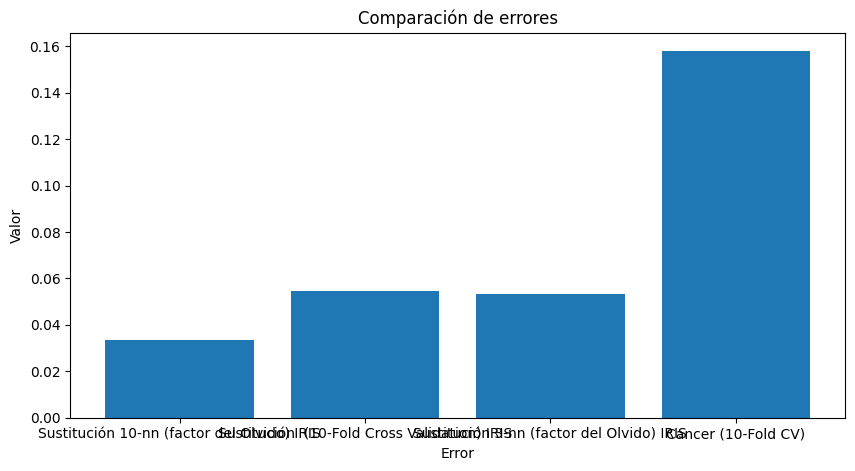

In [24]:
# Visualize errors 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df.columns, df.iloc[0])
plt.xlabel('Error')
plt.ylabel('Valor')
plt.title('Comparación de errores')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2fd3514f-918e-4f88-81eb-2a6f074e5171' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>